In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Customer Conversion Prediction  
Insurance company's telephonic marketing team to reach out customers that are most likely to convert beforehand, so company wants to specifically target customers via call.

### 1) Problem statement
- Using given the historical marketing data of insurance company and we required to build a ML model that will predict if a client will subscribe to the insurance.


### 2) Data Collection
- Dataset Source - https://drive.google.com/file/d/1BJ_Q8Q-kDRisAQyLltBQggeb0QmdWGZy/view?usp=sharing

### Features

- age (numeric)
- job : type of job
- marital : marital status
- educational_qual : education status
- call_type : contact communication type
- day: last contact day of the month (numeric)
- mon: last contact month of year
- dur: last contact duration, in seconds (numeric)
- num_calls: number of contacts performed during this campaign and for this client  
- prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  
- y: has the client subscribed to the insurance?




## 6 Jars of ML 
---
```Data Jar```  

---  
- Check data type
- Check the number of unique values of each column
- Check Missing values
- Check Duplicates
- Check statistics of data set
- Check various categories present in the different categorical column
- Encoding the categorical column based on the type 
- Split the data set  in to train and test
- Ensure balanced data set (If the given data set target feature is caterogical) 
- Scaling the data  
---
```Task Jar```  

---
- Supervised 
- Unsupervised  
--- 
``` Model Jar ``` 
- Based on the data set different model will  be trained  
---  
```Loss Jar ```  
- Based on th selected model, the Loss function will be selected 
---  
``` Learning``` 
- Different models are trained on the data set
- Using hyperpameter of model (only if applicable), best parameters are selected using diff Cross validation methods  
- Score of each model is obtained  
---  
```Evaluation Metric Jar```  
- Using the obtained Score of different model, model will be selcted based on the highest score among the models.

---  







## Data Jar  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/Project 2 Customer conversion/Customer_Conversion_raw.csv')

### Cleaning

In [4]:
# Checking the features

df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
df.shape

(45211, 11)

In [6]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

Data set contains 45211 rows nand 11 columns  
Target feature is categorical and only 2 categories are involved heance its a binary classification problem

In [7]:
#Checking data format and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


Features Dtypes are in proper format  

In [8]:
#Check the number of unique values of each column

for col in df.select_dtypes(include = 'object').columns:
  print(f"Categories in {col} variable: {df[col].nunique()} ")
  print(df[col].unique())
  print()



Categories in job variable: 12 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Categories in marital variable: 3 
['married' 'single' 'divorced']

Categories in education_qual variable: 4 
['tertiary' 'secondary' 'unknown' 'primary']

Categories in call_type variable: 3 
['unknown' 'cellular' 'telephone']

Categories in mon variable: 12 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Categories in prev_outcome variable: 4 
['unknown' 'failure' 'other' 'success']

Categories in y variable: 2 
['no' 'yes']



In [9]:
# Checking for duplicates

df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [10]:
#Dropping the duplicates

df.drop_duplicates(inplace = True)

In [11]:
# Checkng for missing values n the data set columns

df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

No Missing values

In [12]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


Unknown values are present in the 3 features hence we need to check it's proportion

<Axes: >

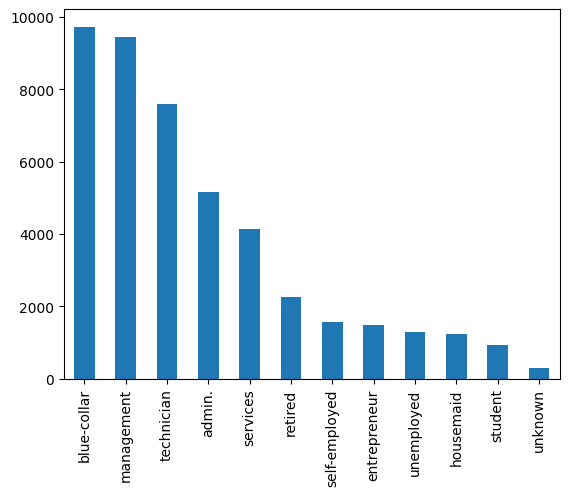

In [13]:
# Job feature
df['job'].value_counts().plot(kind='bar')

unknown categories are very less compare to other hence, 'mode' is used for mapping with major category 

In [14]:
df['job'] = df['job'].str.replace('unknown','blue-collar')

In [15]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

<Axes: >

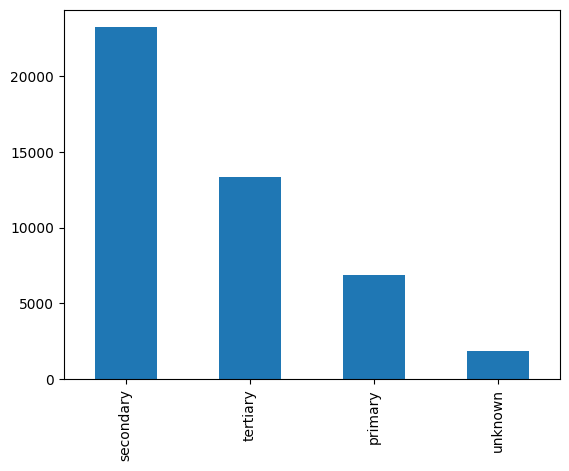

In [16]:
df['education_qual'].value_counts().plot(kind='bar')

unknown categories are very less compare to other hence it 'mode' is used for mapping with major category 

In [17]:
df['education_qual'] = df['education_qual'].str.replace('unknown','secondary')

In [18]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

<Axes: >

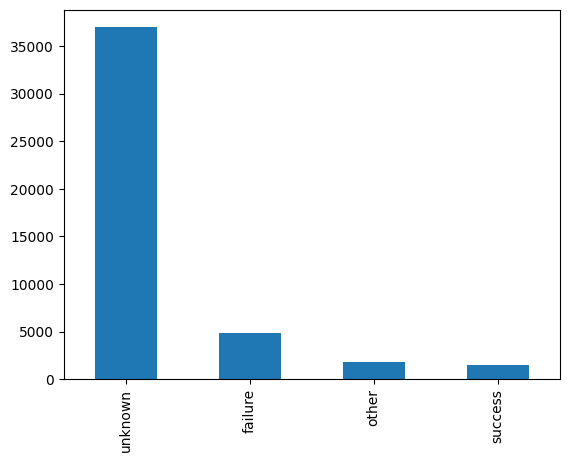

In [19]:
df['prev_outcome'].value_counts().plot(kind='bar')

unknown category is major campare to other hence, it will be treated as sepearate category

### EDA

<Axes: >

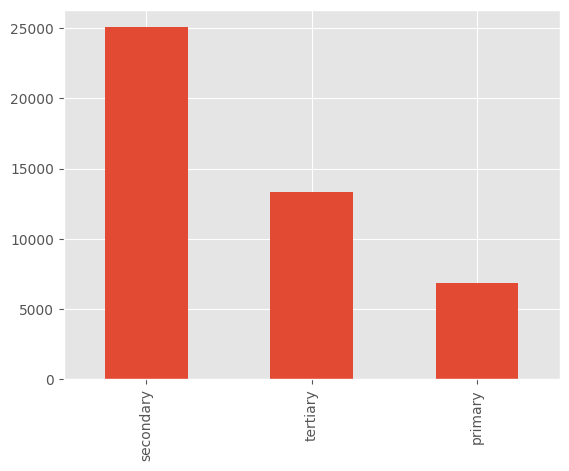

In [ ]:
df['education_qual'].value_counts().plot(kind='bar')

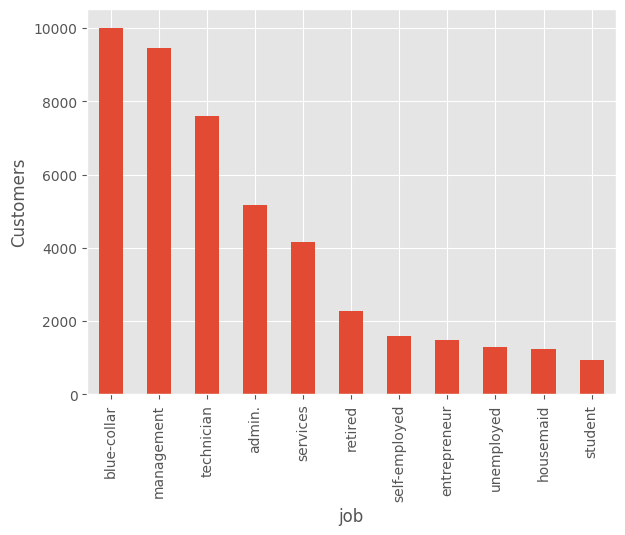

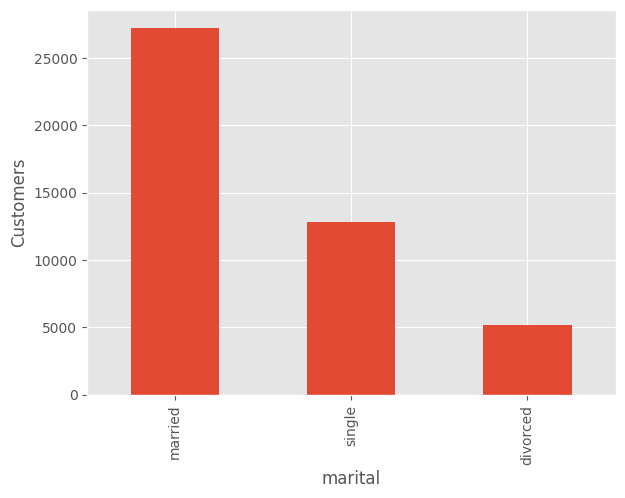

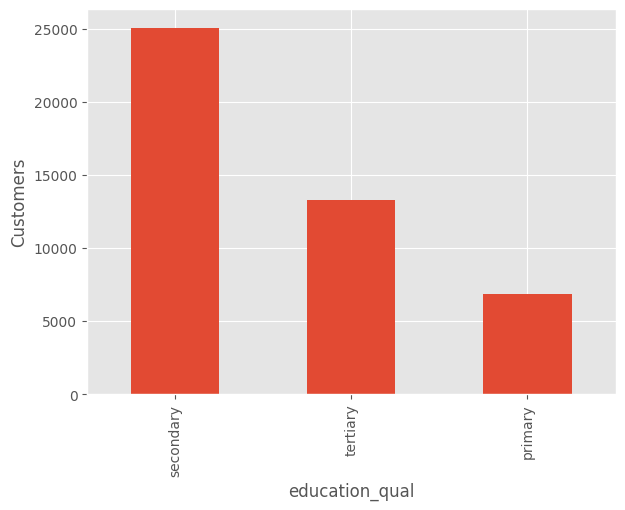

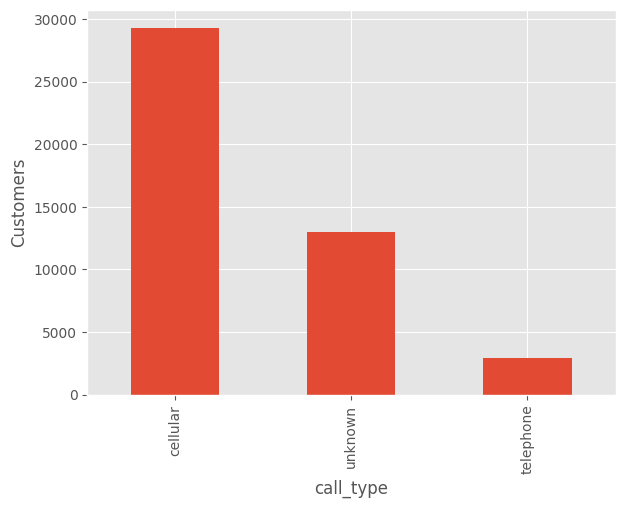

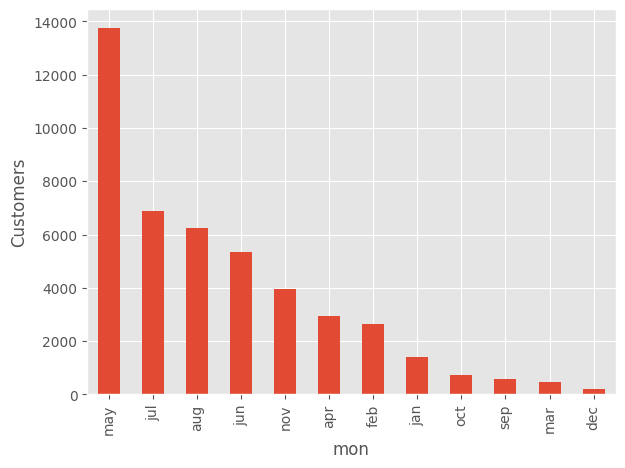

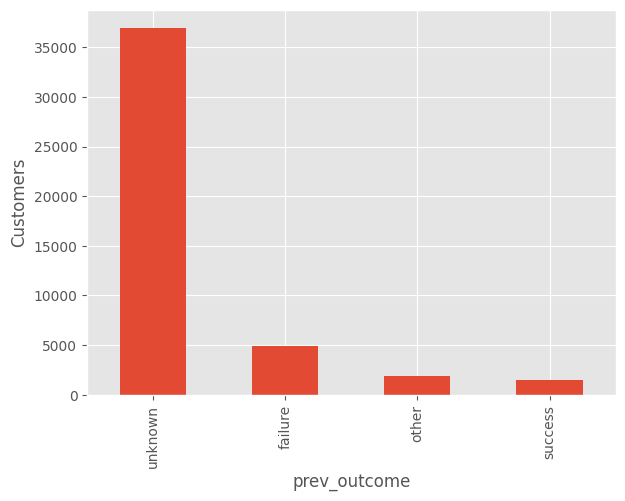

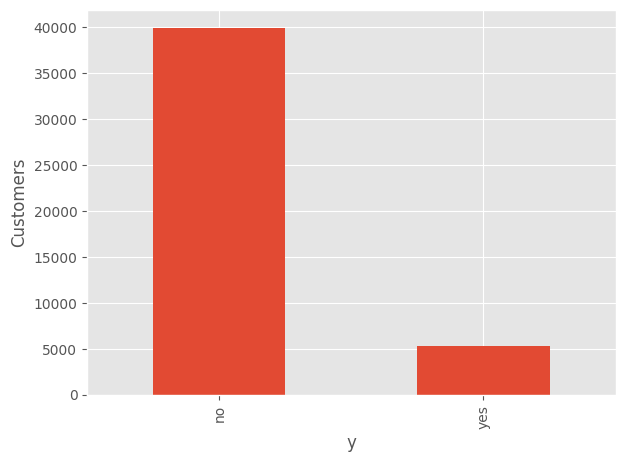

In [ ]:
cat = df.select_dtypes(include = 'object').columns
plt.style.use("ggplot")
for col in cat:
  plt.figure(figsize=(15,5))
  ax = plt.subplot(121)

  df[col].value_counts().plot(kind = 'bar')
  plt.xlabel(col)
  plt.ylabel('Customers')
  plt.title = (col)

---  
```Insights:  ```

---  

⚪ Most contacted job category: blue-color, management, technician  

⚪ marital status : married, single and divorced  

⚪ education : secondary, tertiary and primary

⚪ Call type : cellular

⚪ top 5 Months and least : may, jul, aug, jun, nov and least months are dec, mar, sep , oct  

---




In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

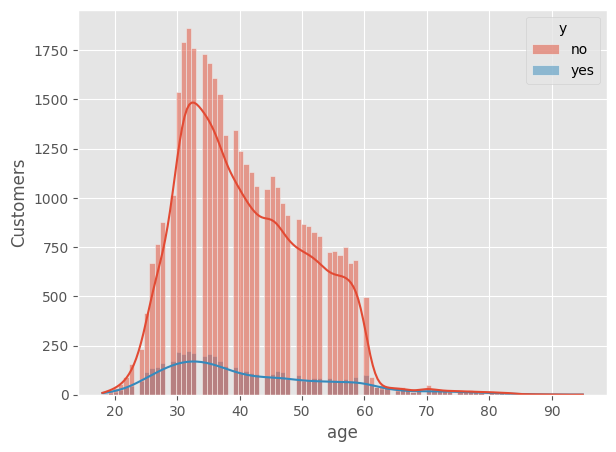

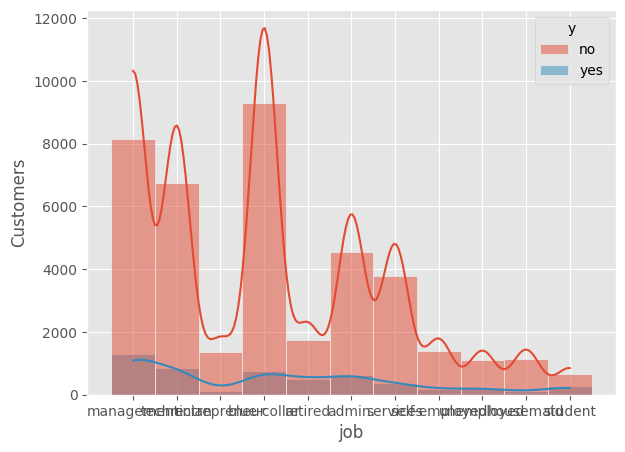

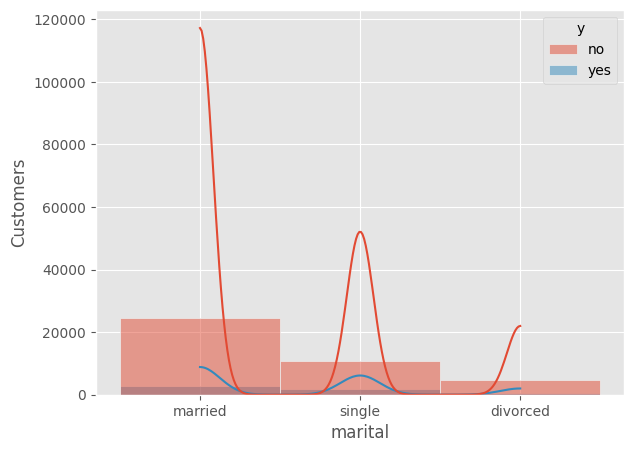

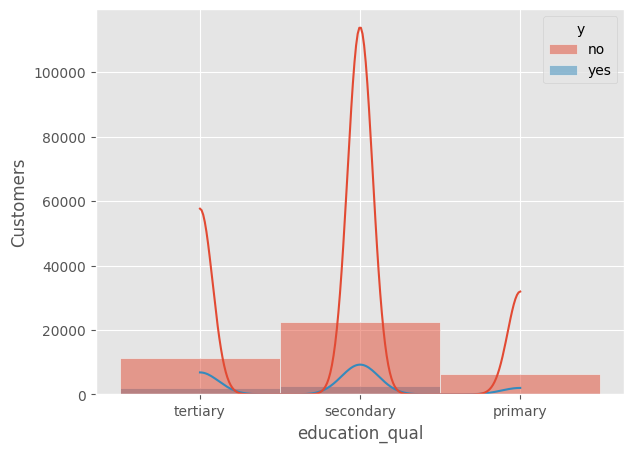

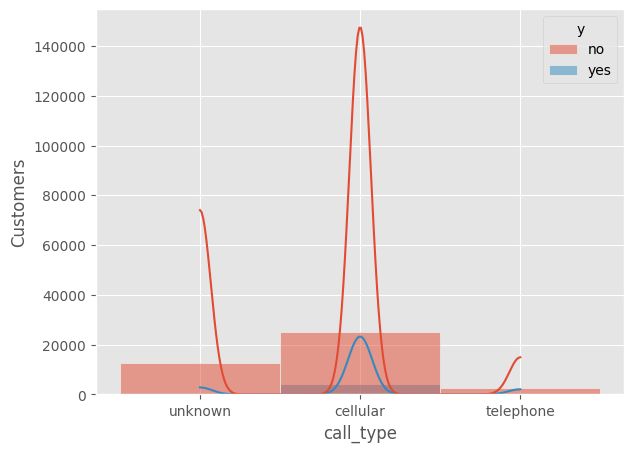

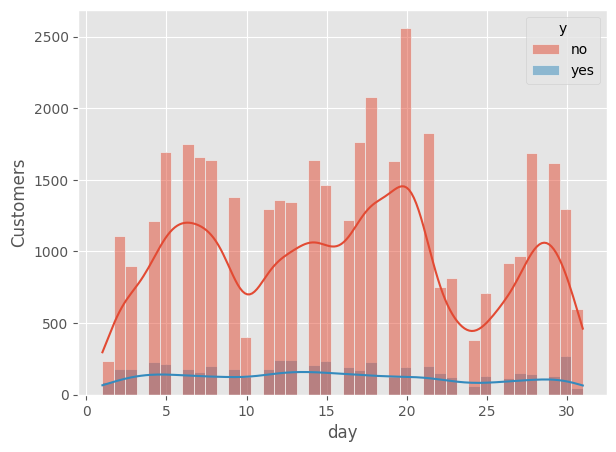

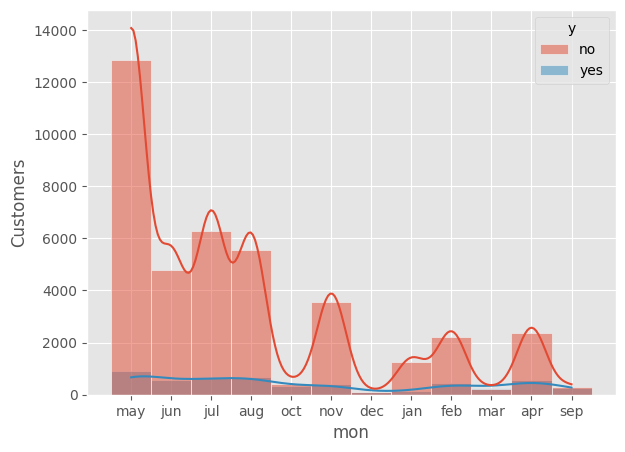

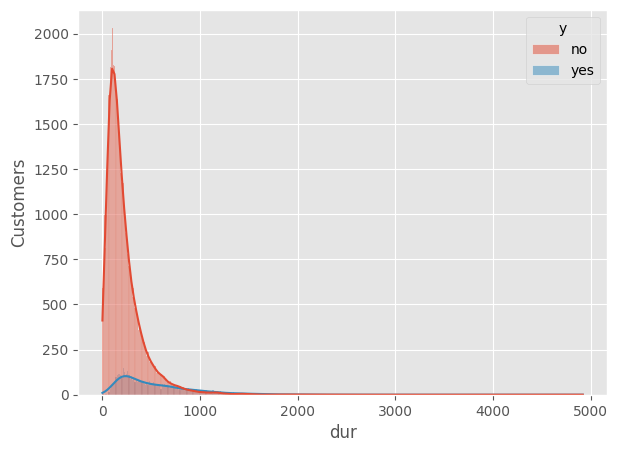

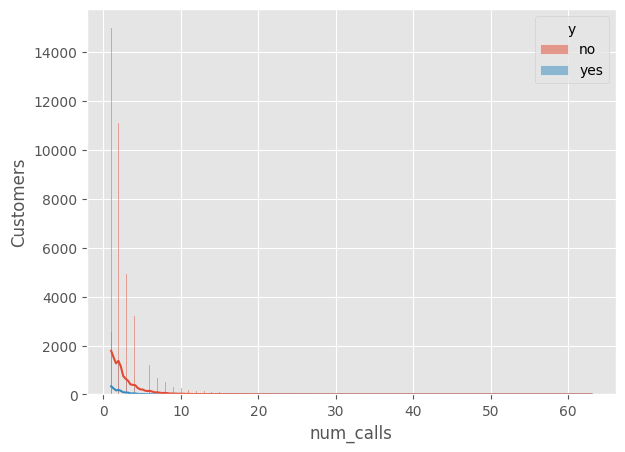

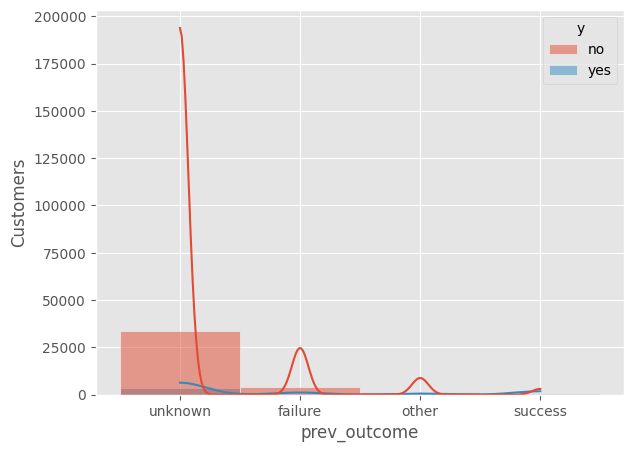

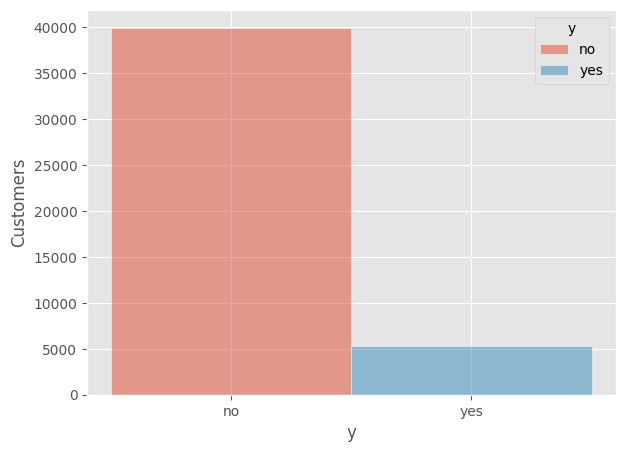

In [ ]:
plt.style.use("ggplot")
for col in df:
  plt.figure(figsize=(15,5))
  ax = plt.subplot(121)

  sns.histplot(data = df, x= col, kde = True, hue = 'y')
  plt.xlabel(col)
  plt.ylabel('Customers')
  plt.title = (col)

--- 
```Insight```  

--- 
⚪ Age between 28 to 40 are subscribed to the insurance are comparatively more  
⚪ Age range between 25 to 60 are the subscribers  
⚪ Highest subscribers are from the job profile: management,technician, bule-color, admin and retired  
⚪  Month which are having less calls and less rejection for accepting the insurance (high chance of conversion): Sep, oct and mar  
⚪ Top 5 days of month: 30, 12, 13, 15, 18, 4, 5

Features vs the target

<Axes: xlabel='job', ylabel='count'>

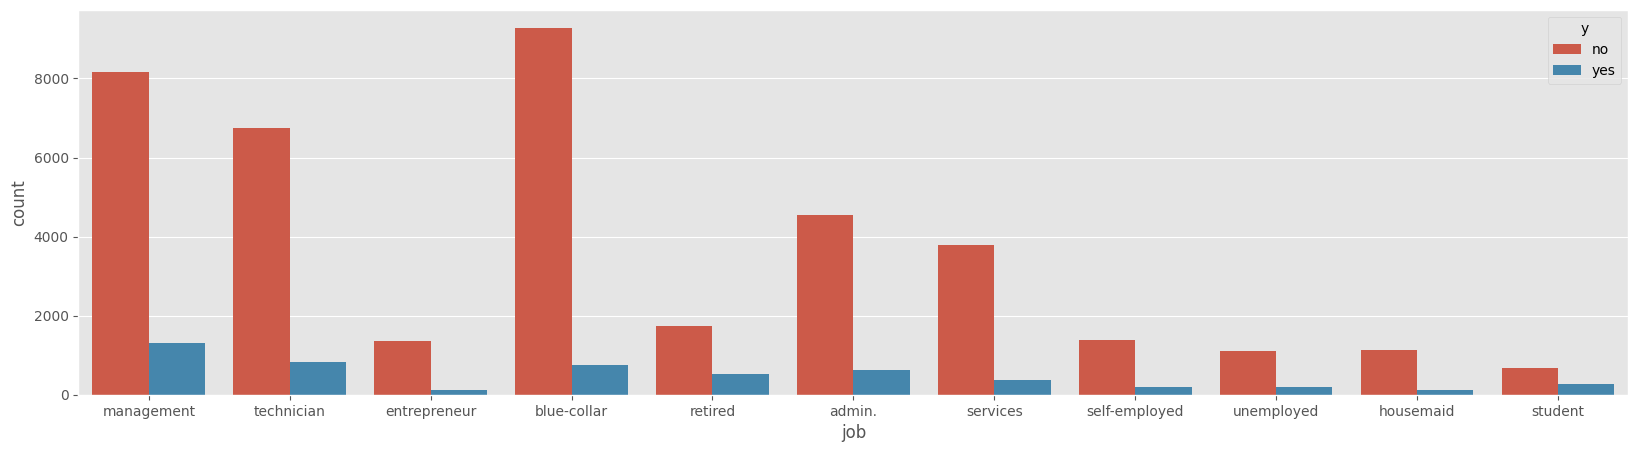

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["job"], hue = df['y'])

In [ ]:
job_cat = df.job.unique()
y_cat = df.y.unique()
yes_ratio = []
no_ratio = []

for i in job_cat:
  for j in y_cat:
    count = df[(df['job']==i) & (df['y']==j)].shape[0]
    if j == 'no':
      no_ratio1 = count/df.shape[0]
      no_ratio.append(round((no_ratio1*100),2))
      print(f"{i} not subscribed ratio: {round((no_ratio1*100),2)}")
    else:
      yes_ratio2 = count/df.shape[0]
      yes_ratio.append(round((yes_ratio2*100),2))
      print(f"{i} subscribed ratio: {round((yes_ratio2*100),2)}")
  print('--------------------------------------------')
print('yes',sorted(yes_ratio, reverse = True))
print('no', sorted(no_ratio, reverse = True))

management not subscribed ratio: 18.04
management subscribed ratio: 2.88
--------------------------------------------
technician not subscribed ratio: 14.95
technician subscribed ratio: 1.86
--------------------------------------------
entrepreneur not subscribed ratio: 3.02
entrepreneur subscribed ratio: 0.27
--------------------------------------------
blue-collar not subscribed ratio: 20.52
blue-collar subscribed ratio: 1.64
--------------------------------------------
retired not subscribed ratio: 3.87
retired subscribed ratio: 1.14
--------------------------------------------
admin. not subscribed ratio: 10.04
admin. subscribed ratio: 1.4
--------------------------------------------
services not subscribed ratio: 8.37
services subscribed ratio: 0.82
--------------------------------------------
self-employed not subscribed ratio: 3.08
self-employed subscribed ratio: 0.41
--------------------------------------------
unemployed not subscribed ratio: 2.44
unemployed subscribed ratio: 

--- 
```Insight```  

--- 
⚪ Most subscribed in ratio wrt job :  
Management - 2.88   
technician - 1.86   
blue-collar - 1.64  
admin - 1.4   
retired - 1.14  

⚪ Most rejected in ratio wrt job:   
blue-collar - 20.52   
Management - 18.04  
technician - 14.95   
admin -  10.04  
service - 8.37  


<Axes: xlabel='marital', ylabel='count'>

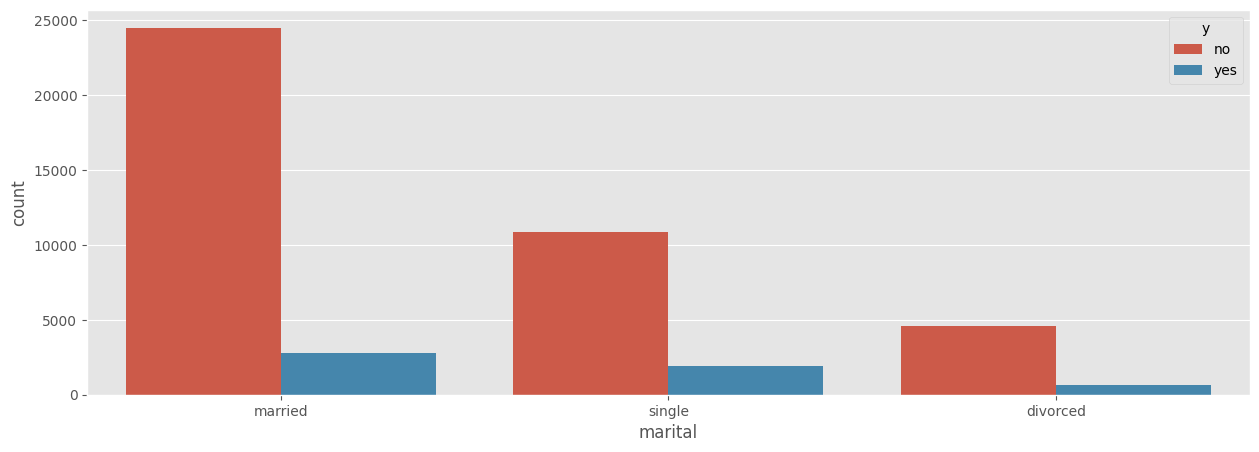

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["marital"], hue = df['y'])

In [ ]:
job_cat = df.marital.unique()
y_cat = df.y.unique()
yes_ratio = []
no_ratio = []

for i in job_cat:
  for j in y_cat:
    count = df[(df['marital']==i) & (df['y']==j)].shape[0]
    if j == 'no':
      no_ratio1 = count/df.shape[0]
      no_ratio.append([i, round((no_ratio1*100),2)])
      print(f"{i} not subscribed ratio: {round((no_ratio1*100),2)}")
    else:
      yes_ratio2 = count/df.shape[0]
      yes_ratio.append([i, round((yes_ratio2*100),2)])
      print(f"{i} subscribed ratio: {round((yes_ratio2*100),2)}")
  print('--------------------------------------------')
print(sorted(yes_ratio, reverse = True))
print(sorted(no_ratio, reverse = True))

married not subscribed ratio: 54.1
married subscribed ratio: 6.09
--------------------------------------------
single not subscribed ratio: 24.06
single subscribed ratio: 4.23
--------------------------------------------
divorced not subscribed ratio: 10.14
divorced subscribed ratio: 1.38
--------------------------------------------
[['single', 4.23], ['married', 6.09], ['divorced', 1.38]]
[['single', 24.06], ['married', 54.1], ['divorced', 10.14]]


--- 
```Insight```  

--- 
⚪ Most subscribed in ratio:  married (6.09%) > single (4.23%) > divorced (1.38%)  
  
⚪ Most rejected in ratio:  married (54.1%) > single (24.06%) > divorced (10.14%) 


<Axes: xlabel='education_qual', ylabel='count'>

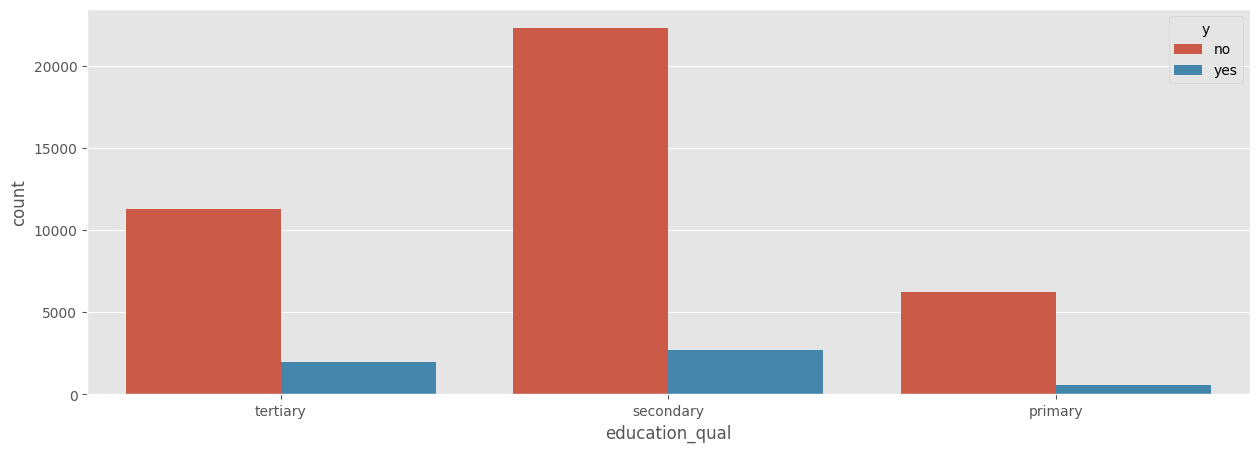

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["education_qual"], hue = df['y'])

In [ ]:
job_cat = df.education_qual.unique()
y_cat = df.y.unique()
yes_ratio = []
no_ratio = []

for i in job_cat:
  for j in y_cat:
    count = df[(df['education_qual']==i) & (df['y']==j)].shape[0]
    if j == 'no':
      no_ratio1 = count/df.shape[0]
      no_ratio.append([i, round((no_ratio1*100),2)])
      print(f"{i} not subscribed ratio: {round((no_ratio1*100),2)}")
    else:
      yes_ratio2 = count/df.shape[0]
      yes_ratio.append([i, round((yes_ratio2*100),2)])
      print(f"{i} subscribed ratio: {round((yes_ratio2*100),2)}")
  print('--------------------------------------------')
print('yes', sorted(yes_ratio,reverse = True))
print('no',sorted(no_ratio, reverse = True))

tertiary not subscribed ratio: 25.0
tertiary subscribed ratio: 4.42
--------------------------------------------
secondary not subscribed ratio: 49.45
secondary subscribed ratio: 5.98
--------------------------------------------
primary not subscribed ratio: 13.85
primary subscribed ratio: 1.31
--------------------------------------------
yes [['tertiary', 4.42], ['secondary', 5.98], ['primary', 1.31]]
no [['tertiary', 25.0], ['secondary', 49.45], ['primary', 13.85]]


--- 
```Insight```  

--- 
⚪ Most subscribed in ratio:  secondary (5.98%) > tertiary (4.42%) > primary (1.31%)  
  
⚪ Most rejected in ratio:  secondary (49.45%) > tertiary (25.00%) > primary (13.85%) 


<Axes: xlabel='day', ylabel='count'>

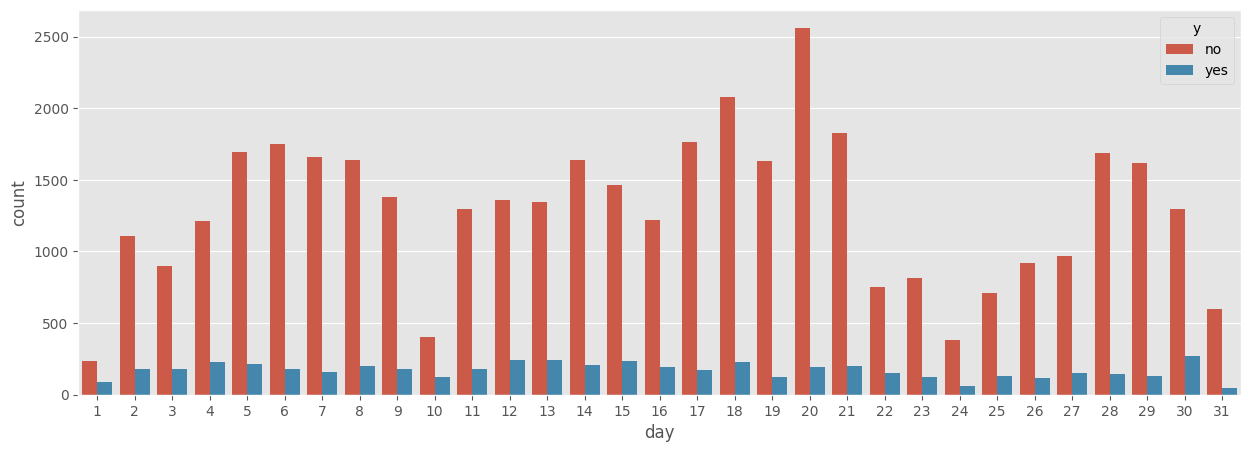

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["day"], hue = df['y'])

In [ ]:
job_cat = df.day.unique()
y_cat = df.y.unique()
yes_ratio = []
no_ratio = []

for i in job_cat:
  for j in y_cat:
    count = df[(df['day']==i) & (df['y']==j)].shape[0]
    if j == 'no':
      no_ratio1 = count/df.shape[0]
      no_ratio.append(round((no_ratio1*100),2))
      print(f"Day {i} not subscribed ratio: {round((no_ratio1*100),2)}")
    else:
      yes_ratio2 = count/df.shape[0]
      yes_ratio.append(round((yes_ratio2*100),2))
      print(f"Day {i} subscribed ratio: {round((yes_ratio2*100),2)}")
  print('--------------------------------------------')
print('yes', sorted(yes_ratio,reverse = True))
print('no',sorted(no_ratio, reverse = True))

Day 5 not subscribed ratio: 3.75
Day 5 subscribed ratio: 0.48
--------------------------------------------
Day 6 not subscribed ratio: 3.87
Day 6 subscribed ratio: 0.4
--------------------------------------------
Day 7 not subscribed ratio: 3.67
Day 7 subscribed ratio: 0.35
--------------------------------------------
Day 8 not subscribed ratio: 3.63
Day 8 subscribed ratio: 0.44
--------------------------------------------
Day 9 not subscribed ratio: 3.05
Day 9 subscribed ratio: 0.4
--------------------------------------------
Day 12 not subscribed ratio: 3.01
Day 12 subscribed ratio: 0.54
--------------------------------------------
Day 13 not subscribed ratio: 2.97
Day 13 subscribed ratio: 0.53
--------------------------------------------
Day 14 not subscribed ratio: 3.62
Day 14 subscribed ratio: 0.46
--------------------------------------------
Day 15 not subscribed ratio: 3.24
Day 15 subscribed ratio: 0.53
--------------------------------------------
Day 16 not subscribed ratio: 2.

--- 
```Insight```  

--- 
⚪ Top 5 Days subscribed:  
- Day 30 (0.6)
- Day 12 (0.54)
- Day 13 (0.53)  
- Day 14 (0.53)
- Day 4 (0.51)  

  
⚪ Top 5 Days rejected:
- Day 20 (5.66)
- Day 18 (4.6)
- Day 21 (4.04)
- Day 17 (3.9)
- Day 6 (3.87)

<Axes: xlabel='mon', ylabel='count'>

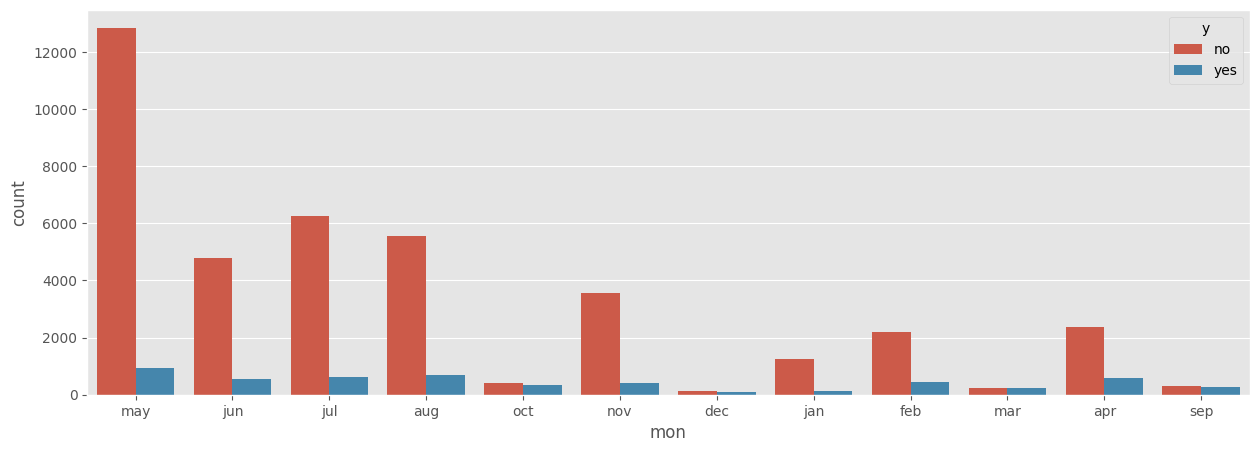

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["mon"], hue = df['y'])

In [ ]:
job_cat = df.mon.unique()
y_cat = df.y.unique()
yes_ratio = []
no_ratio = []

for i in job_cat:
  for j in y_cat:
    count = df[(df['mon']==i) & (df['y']==j)].shape[0]
    if j == 'no':
      no_ratio1 = count/df.shape[0]
      no_ratio.append(round((no_ratio1*100),2))
      print(f"month {i} not subscribed ratio: {round((no_ratio1*100),2)}")
    else:
      yes_ratio2 = count/df.shape[0]
      yes_ratio.append(round((yes_ratio2*100),2))
      print(f"month {i} subscribed ratio: {round((yes_ratio2*100),2)}")
  print('--------------------------------------------')
print('yes', sorted(yes_ratio,reverse = True))
print('no',sorted(no_ratio, reverse = True))

month may not subscribed ratio: 28.4
month may subscribed ratio: 2.05
--------------------------------------------
month jun not subscribed ratio: 10.6
month jun subscribed ratio: 1.21
--------------------------------------------
month jul not subscribed ratio: 13.86
month jul subscribed ratio: 1.39
--------------------------------------------
month aug not subscribed ratio: 12.29
month aug subscribed ratio: 1.52
--------------------------------------------
month oct not subscribed ratio: 0.92
month oct subscribed ratio: 0.71
--------------------------------------------
month nov not subscribed ratio: 7.89
month nov subscribed ratio: 0.89
--------------------------------------------
month dec not subscribed ratio: 0.25
month dec subscribed ratio: 0.22
--------------------------------------------
month jan not subscribed ratio: 2.79
month jan subscribed ratio: 0.31
--------------------------------------------
month feb not subscribed ratio: 4.88
month feb subscribed ratio: 0.98
--------

--- 
```Insight```  

--- 
⚪ Top 5 Months subscribed:  
- Month May (2.05)
- Month Aug (1.52)
- Month Jul (1.39)  
- Month Apr (1.28)
- Month Jun (1.21)  

  
⚪ Top rejected months : In Month Oct, Sep and Mar very less no of people contacted but rejection to subscribers ratio is comparable wrt other months.

In [ ]:
import numpy as np

<Axes: xlabel='dur', ylabel='count'>

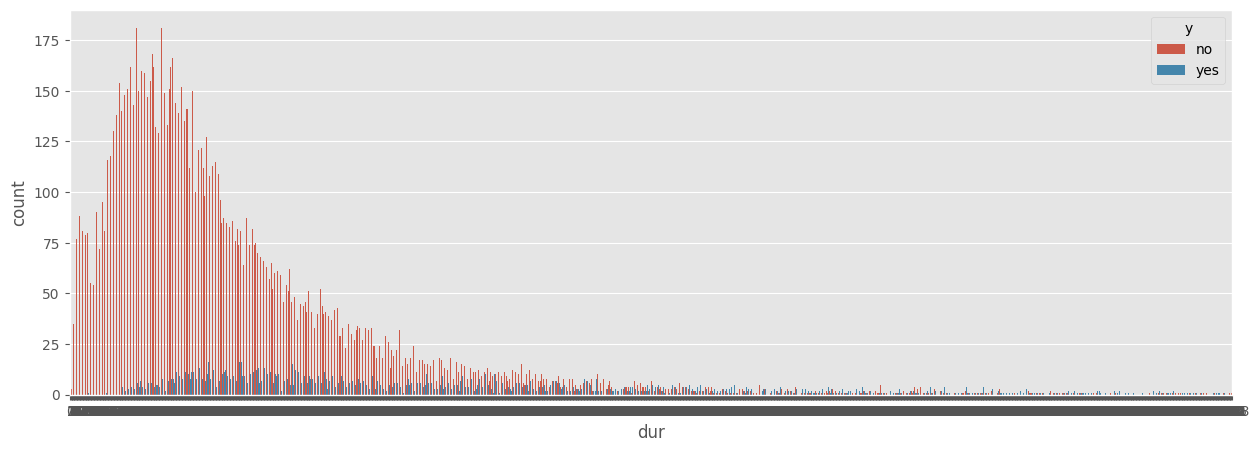

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["dur"], hue = df['y'])

Note: duration and number of calls shall be concluded after removal of outliers in the features

<Axes: xlabel='prev_outcome', ylabel='count'>

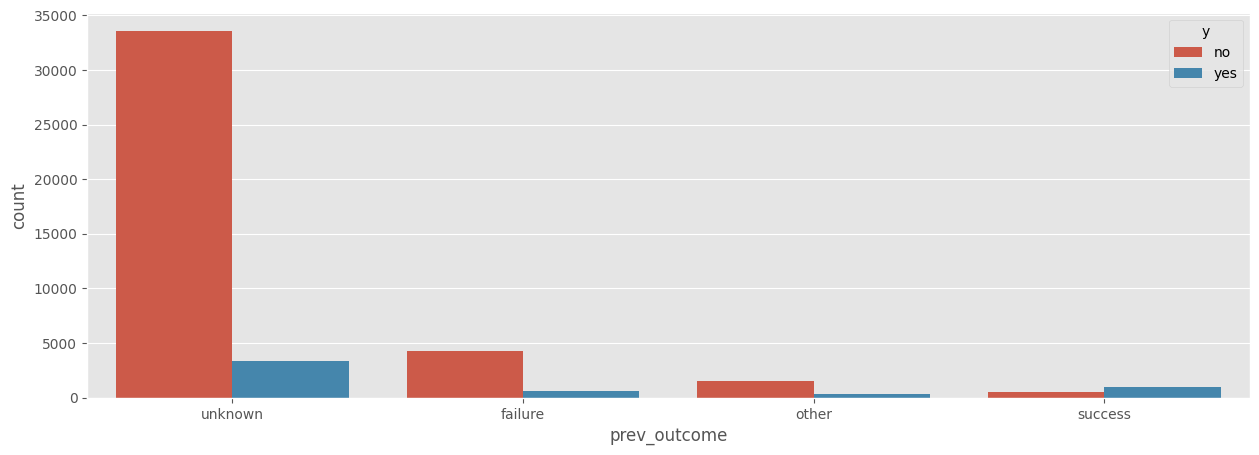

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["prev_outcome"], hue = df['y'])

In [ ]:
job_cat = df.prev_outcome.unique()
y_cat = df.y.unique()
yes_ratio = []
no_ratio = []

for i in job_cat:
  for j in y_cat:
    count = df[(df['prev_outcome']==i) & (df['y']==j)].shape[0]
    if j == 'no':
      no_ratio1 = count/df.shape[0]
      no_ratio.append(round((no_ratio1*100),2))
      print(f"outcome {i} not subscribed ratio: {round((no_ratio1*100),2)}")
    else:
      yes_ratio2 = count/df.shape[0]
      yes_ratio.append(round((yes_ratio2*100),2))
      print(f"outcome {i} subscribed ratio: {round((yes_ratio2*100),2)}")
  print('--------------------------------------------')
print('yes', sorted(yes_ratio,reverse = True))
print('no',sorted(no_ratio, reverse = True))

outcome unknown not subscribed ratio: 74.26
outcome unknown subscribed ratio: 7.49
--------------------------------------------
outcome failure not subscribed ratio: 9.47
outcome failure subscribed ratio: 1.37
--------------------------------------------
outcome other not subscribed ratio: 3.39
outcome other subscribed ratio: 0.68
--------------------------------------------
outcome success not subscribed ratio: 1.18
outcome success subscribed ratio: 2.16
--------------------------------------------
yes [7.49, 2.16, 1.37, 0.68]
no [74.26, 9.47, 3.39, 1.18]


Unknown > success

In [ ]:
#Checking for outliers
col = ['age', 'dur','num_calls']
for i in col:
  iq1,iq3 = df[i].quantile([0.25,0.75])
  iq = iq3 - iq1
  upper = iq3+1.5*iq
  lower = iq1-1.5*iq

  print(f"{i} upper limit: {upper}")
  print(f"{i} lower limit: {lower}")
  print()

age upper limit: 70.5
age lower limit: 10.5

dur upper limit: 643.0
dur lower limit: -221.0

num_calls upper limit: 6.0
num_calls lower limit: -2.0



In [ ]:
#age
age_upper_limit = 70.5
age_lower_limit = 10.5

df['age'] = np.where(df['age']>age_upper_limit, age_upper_limit,
                     np.where(df['age']<age_lower_limit, age_lower_limit,
                              df['age'])
                     )

#dur 
dur_upper_limit =643.0
dur_lower_limit = -221.0

df['dur'] = np.where(df['dur']>dur_upper_limit, dur_upper_limit,
                     np.where(df['dur']<dur_lower_limit, dur_lower_limit,df['dur']))


#num_calls 
num_calls_upper_limit =6.0
num_calls_lower_limit = -2.0


df['num_calls'] = np.where(df['num_calls']>num_calls_upper_limit, num_calls_upper_limit,
                     np.where(df['num_calls']<num_calls_lower_limit, num_calls_lower_limit,df['num_calls']))

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


In [ ]:
# Duration
print("Subscribed above mean call duration" ,df[(df['dur']>=235) & (df['y']=='yes')].shape[0])
print("Subscribed below mean call duration" ,df[(df['dur']<=235) & (df['y']=='yes')].shape[0])
print("Not Subscribed after mean call duration" ,df[(df['dur']>=235) & (df['y']=='no')].shape[0])
print("Not Subscribed below mean call duration" ,df[(df['dur']<=235) & (df['y']=='no')].shape[0])


Subscribed above mean call duration 4045
Subscribed below mean call duration 1250
Not Subscribed after mean call duration 12995
Not Subscribed below mean call duration 26985


In [ ]:
print("Subscribed after mean call" ,df[(df['num_calls']>=2) & (df['y']=='yes')].shape[0])
print("Subscribed below mean call" ,df[(df['num_calls']<=2) & (df['y']=='yes')].shape[0])
print("Not Subscribed after mean call" ,df[(df['num_calls']>=2) & (df['y']=='no')].shape[0])
print("Not Subscribed below mean call" ,df[(df['num_calls']<=2) & (df['y']=='no')].shape[0])

Subscribed after mean call 2728
Subscribed below mean call 3962
Not Subscribed after mean call 24935
Not Subscribed below mean call 26083


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

### Encoding the Data

In [21]:
df.head() 

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no


In [ ]:
for col in df.select_dtypes(include = 'object').columns:
  print(f"Categories in {col} variable: {df[col].nunique()} ")
  print(df[col].unique())
  print()

Categories in job variable: 11 
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Categories in marital variable: 3 
['married' 'single' 'divorced']

Categories in education_qual variable: 3 
['tertiary' 'secondary' 'primary']

Categories in call_type variable: 3 
['unknown' 'cellular' 'telephone']

Categories in mon variable: 12 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Categories in prev_outcome variable: 4 
['unknown' 'failure' 'other' 'success']

Categories in y variable: 2 
['no' 'yes']



⭕ Label Encoding  
 ```Note```  Order is observed in the follwing feature:  
 - education_qual  
 - marital  
 - call_type 
 - prev_outcome  
 - y 

⭕One Hot Encoding:
- job  
-  mon 


In [22]:
# Label encoding
df['education_qual'] = df['education_qual'].map({"secondary":2, "tertiary":1, "primary":0})
df["marital"] = df["marital"].map({"married":2,"single":1, "divorced":0})
df["call_type"] = df["call_type"].map({"cellular":2,"unknown":1, "telephone":0})
df["y"] = df["y"].map({"yes" : 1, "no" : 0})

In [23]:
#OneHot encoding
df = pd.get_dummies(df,columns = ["job", "mon"]) 
df = pd.get_dummies(df,columns = ["prev_outcome"]) 

In [24]:
df.head()

,age,marital,education_qual,call_type,day,dur,num_calls,y,job_admin.,job_blue-collar,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,2,1,1,5,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,1,2,1,5,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,2,1,5,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,2,2,1,5,92,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,2,1,5,198,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [25]:
#Ensuring the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   45205 non-null  int64
 1   marital               45205 non-null  int64
 2   education_qual        45205 non-null  int64
 3   call_type             45205 non-null  int64
 4   day                   45205 non-null  int64
 5   dur                   45205 non-null  int64
 6   num_calls             45205 non-null  int64
 7   y                     45205 non-null  int64
 8   job_admin.            45205 non-null  uint8
 9   job_blue-collar       45205 non-null  uint8
 10  job_entrepreneur      45205 non-null  uint8
 11  job_housemaid         45205 non-null  uint8
 12  job_management        45205 non-null  uint8
 13  job_retired           45205 non-null  uint8
 14  job_self-employed     45205 non-null  uint8
 15  job_services          45205 non-null  uint8
 16  job_

### Exporting the cleaned data set

In [27]:
df.to_csv('/content/drive/MyDrive/Project/Project 2 (v2)/cleaned_file.csv', index = False)

### Splitting

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns = ['y'])
y = df['y']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Ensuring for balanced dataset

0    31975
1     4189
Name: y, dtype: int64

propotion of 0: 0.88%
propotion of 1: 0.12%


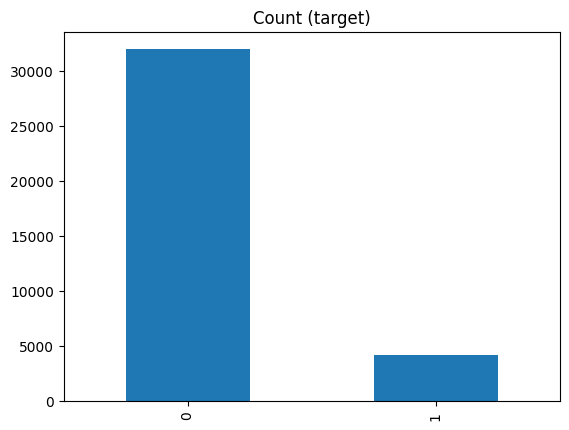

In [30]:
target_count = y_train.value_counts()

print(target_count)
print()
print(f"propotion of 0: {round(target_count[0]/(target_count[0]+target_count[1]),2)}%")
print(f"propotion of 1: {round(target_count[1]/(target_count[0]+target_count[1]),2)}%")
target_count.plot(kind='bar', title='Count (target)');

target variable class 1 are only 12% in proportion and we can accept that the given data set is  imbalanced  
```Balancing the dataset``` 

In [31]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [32]:
y_smt.value_counts()

1    29784
0    20861
Name: y, dtype: int64


propotion of 0: 0.41%
propotion of 1: 0.59%


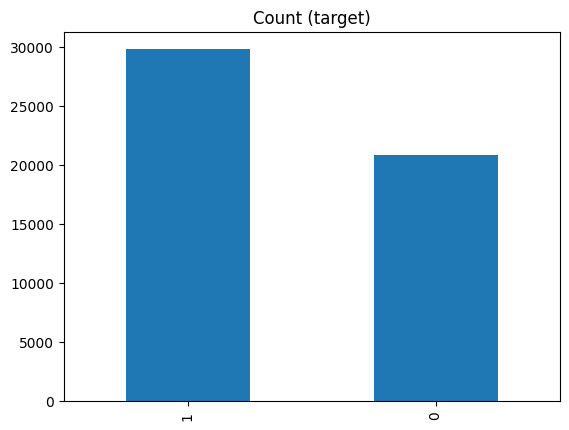

In [33]:
target_count_smt = y_smt.value_counts()
print()
print(f"propotion of 0: {round(target_count_smt[0]/(target_count_smt[0]+target_count_smt[1]),2)}%")
print(f"propotion of 1: {round(target_count_smt[1]/(target_count_smt[0]+target_count_smt[1]),2)}%")
target_count_smt.plot(kind='bar', title='Count (target)');

Dataset is in balanced proportion

### Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smt)
X_smt = scaler.transform(X_smt)
X_test = scaler.transform(X_test)

## Model Jar

In [36]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

### Modeling using some hyperparameter

In [ ]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(max_depth=4),
          RandomForestClassifier(max_depth = 5, max_features='sqrt'),
          xgb.XGBClassifier(verbosity = 0)]

In [76]:
def compare_model_cv(models:list):

  result = []

  for model in models:
    mod = model.fit(X_smt, y_smt) # fitting model without CV

    train_predictions = mod.predict(X_smt)
    train_score = roc_auc_score(y_smt, train_predictions)  

    test_predictions = mod.predict(X_test)
    test_score = roc_auc_score(y_test, test_predictions)

    cv_score = cross_val_score(model, X_smt, y_smt, cv=5) #fitting model with CV

    train_score = round(train_score,3)
    test_score = round(test_score,3)
    cv = round(np.mean(cv_score),3)


    print('AUROC training score of the ',model,'=',train_score,'%')
    print('AUROC test score of the ',model,'=',test_score,'%')
    print('Cross Validation accuracy for the',model,'=', cv,'%')
    print('-'*70)

    result.append({
                  'model used' : model,
                  'training Score (AUROC)' : train_score,
                  'test Score (AUROC)' : test_score,
                  'CV Score' : cv
                   })
    
  result_dataframe = pd.DataFrame(result, columns = ['model used','training Score (AUROC)', 'test Score (AUROC)', 'CV Score'])

  return result_dataframe

    

In [ ]:
model_selection_df = compare_model_cv(models)

AUROC training score of the  LogisticRegression() = 0.96 %
AUROC test score of the  LogisticRegression() = 0.784 %
Cross Validation accuracy for the LogisticRegression() = 0.935 %
----------------------------------------------------------------------
AUROC training score of the  KNeighborsClassifier() = 0.964 %
AUROC test score of the  KNeighborsClassifier() = 0.731 %
Cross Validation accuracy for the KNeighborsClassifier() = 0.923 %
----------------------------------------------------------------------
AUROC training score of the  DecisionTreeClassifier(max_depth=4) = 0.88 %
AUROC test score of the  DecisionTreeClassifier(max_depth=4) = 0.764 %
Cross Validation accuracy for the DecisionTreeClassifier(max_depth=4) = 0.881 %
----------------------------------------------------------------------
AUROC training score of the  RandomForestClassifier(max_depth=5) = 0.922 %
AUROC test score of the  RandomForestClassifier(max_depth=5) = 0.812 %
Cross Validation accuracy for the RandomForestCla

In [ ]:
model_selection_df

,model used,training Score (AUROC),test Score (AUROC),CV Score
0,LogisticRegression(),0.960,0.784,0.935
1,KNeighborsClassifier(),0.964,0.731,0.923
2,DecisionTreeClassifier(max_depth=4),0.880,0.764,0.881
3,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.922,0.812,0.922
4,"XGBClassifier(base_score=None, booster=None, c...",0.986,0.849,0.943


---  
```Model selection (With out tuning)```  

---
Over fitted model: RF   
Best model among above (based on the optimum value of trade off): XBGClass

###  Cross validation functions

In [ ]:
#parameters 

model_hyperparameters = {
    

    #'log_reg_hyperparameters': {
        
       # 'C' : [1,5,10,20],
        #'max_iter' : [1000],
        #'solver' : ['lbfgs','saga']
   # },


    #'KNN_hyperparameters' : {
        
        #'n_neighbors' : [3,5,10]
    #},

        #'DT' : {
        #'max_depth': [4,5,6],
        #'min_samples_leaf': [5, 10, 20, 50, 100],
        #'criterion': ["gini", "entropy"]
    #},


    #'random_forest_hyperparameters' : {
        
        #'n_estimators' : [100, 1000],
        #'max_depth' : [5],
        #'max_features' : ['sqrt', 'log2'],
    #},


    'xgbclass_hyperparameters' : {
        'max_depth' : [5],
        'learning_rate' : [0.001], #,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8
        'n_estimators' : [1000], #,100,500,1000
        #'booster' : ['gbtree',  'dart']
    }


}

model_keys = list(model_hyperparameters.keys())

In [ ]:
model_hyperparameters[model_keys[0]]

{'max_depth': [5], 'learning_rate': [0.001], 'n_estimators': [1000]}

In [ ]:
def model_cv(leaning_rate:list):

  result = []

  for lr in leaning_rate:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
    mod = model.fit(X_smt, y_smt) # fitting model without CV

    train_predictions = mod.predict(X_smt)
    train_score = roc_auc_score(y_smt, train_predictions)  

    test_predictions = mod.predict(X_test)
    test_score = roc_auc_score(y_test, test_predictions)

    #cv_score = cross_val_score(model, X_smt, y_smt, cv=5) #fitting model with CV

    train_score = round(train_score,3)
    test_score = round(test_score,3)
    #cv = round(np.mean(cv_score),3)

    print('Learning rate with 100 estimators =', lr)
    print('AUROC training score =',train_score,'%')
    print('AUROC test score =',test_score,'%')
    #print('Cross Validation accuracy for the',model,'=', cv,'%')
    print('-'*70)

    result.append({
                  'model used' : "XGB",
                  'Train Score' : train_score,
                  'Test Score' : test_score,
                  'Lr' : lr
                   })
    
  result_dataframe = pd.DataFrame(result, columns = ['model used','Train Score', 'Test Score', 'Lr'])

  return result_dataframe

In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('--'*40)


    classifier = GridSearchCV(model, params, cv=5, n_jobs = -1)

    # fitting the data to classifier
    classifier.fit(X_smt,y_smt)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [48]:
def model_cv(leaning_rate:list, estimators = 100):

  result = []
  train_scores = []
  test_scores = []
  learning_rates = []

  for lr in leaning_rate:

    model = xgb.XGBClassifier(learning_rate = lr, n_estimators=estimators, verbosity = 0)
    learning_rates.append(lr)
    mod = model.fit(X_smt, y_smt) # fitting model without CV


    
    train_predictions = mod.predict(X_smt)
    train_score = roc_auc_score(y_smt, train_predictions)  
    train_scores.append(train_score)

    test_predictions = mod.predict(X_test)
    test_score = roc_auc_score(y_test, test_predictions)
    test_scores.append(test_score)

    train_score = round(train_score,3)
    test_score = round(test_score,3)
    #cv = round(np.mean(cv_score),3)

    result.append({
                  'model used' : "XGB",
                  'Train Score' : train_score,
                  'Test Score' : test_score,
                  'Lr' : lr
                   })
    
  result_dataframe = pd.DataFrame(result, columns = ['model used','Train Score', 'Test Score', 'Lr'])
  plt.plot(learning_rates, train_scores, 'o-', label='Train score')
  plt.plot(learning_rates, test_scores, 'o-', label='Test score')
  plt.xlabel(f'Learning rate ({estimators} Estimators)')
  plt.ylabel('Score')
  plt.legend(loc='best')
  plt.show()

  return result_dataframe

### Hyperparameter tuning

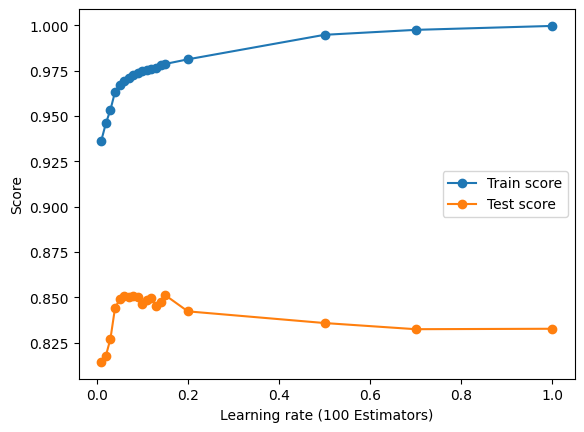

In [ ]:
lr = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]
model_cv_value_100 = model_cv(lr)

In [ ]:
model_cv_value_100.sort_values(by = 'Test Score', ascending=False).head(5)

,model used,Train Score,Test Score,Lr
14,XGB,0.979,0.851,0.15
5,XGB,0.969,0.851,0.06
7,XGB,0.973,0.851,0.08
6,XGB,0.971,0.850,0.07
8,XGB,0.974,0.850,0.09


For 100 estimators the model is starts to overfits at learning rate 0.2 and test score is getting drop  
Hence trying another iteration with different estimators and learning rate below 0.2 

In [ ]:
model_result = []
model_result.append({
              'Estimator' : 100,
              'Train Score' : 0.979,
              'Test Score' : 0.851,
              'Lr' : 0.15
                })

model_results = pd.DataFrame(model_result, columns = ['Estimator','Train Score', 'Test Score', 'Lr'])

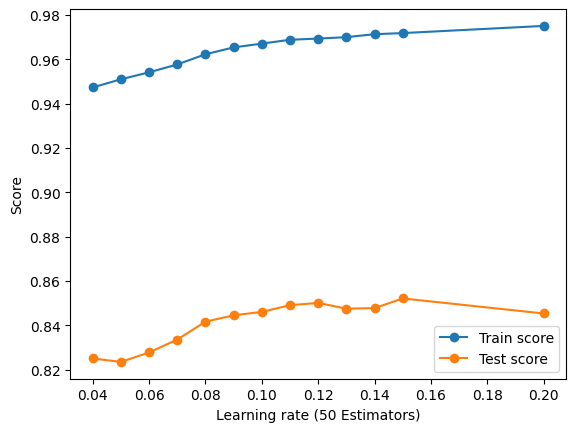

In [ ]:
lr = [0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2]
model_cv_value_50 = model_cv(lr,50)

In [ ]:
model_cv_value_50.sort_values(by = 'Test Score', ascending=False).head(5)

,model used,Train Score,Test Score,Lr
11,XGB,0.972,0.852,0.15
8,XGB,0.969,0.850,0.12
7,XGB,0.969,0.849,0.11
9,XGB,0.970,0.848,0.13
10,XGB,0.971,0.848,0.14


In [ ]:
model_result.append({
              'Estimator' : 50,
              'Train Score' : 0.972,
              'Test Score' : 0.852,
              'Lr' : 0.15
                })

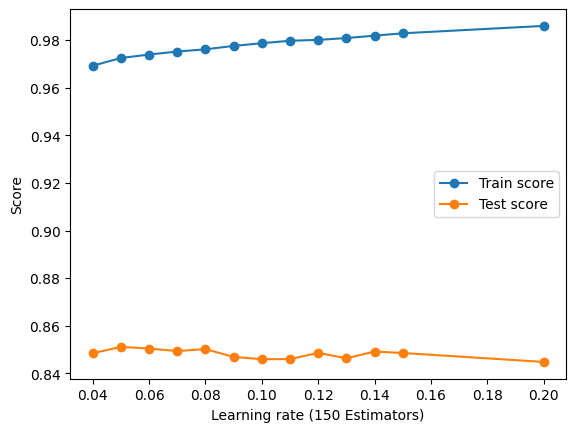

In [ ]:
lr = [0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2]
model_cv_value_150 = model_cv(lr,150)

In [ ]:
model_cv_value_150.sort_values(by = 'Test Score', ascending=False).head(5)

,model used,Train Score,Test Score,Lr
1,XGB,0.972,0.851,0.05
2,XGB,0.974,0.850,0.06
4,XGB,0.976,0.850,0.08
3,XGB,0.975,0.849,0.07
8,XGB,0.980,0.849,0.12


In [ ]:
model_result.append({
              'Estimator' : 150,
              'Train Score' : 0.972,
              'Test Score' : 0.851,
              'Lr' : 0.05
                })

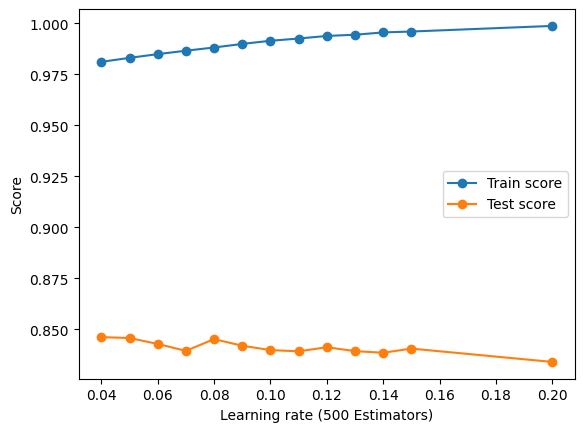

In [ ]:
lr = [0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2]
model_cv_value_500 = model_cv(lr,500 )

In [ ]:
model_cv_value_500.sort_values(by = 'Test Score', ascending=False).head(5)

,model used,Train Score,Test Score,Lr
0,XGB,0.981,0.846,0.04
1,XGB,0.983,0.846,0.05
4,XGB,0.988,0.845,0.08
2,XGB,0.985,0.843,0.06
5,XGB,0.990,0.842,0.09


In [ ]:
model_result.append({
              'Estimator' : 500,
              'Train Score' : 0.981,
              'Test Score' : 0.846,
              'Lr' : 0.04
                })

In [ ]:
model_results = pd.DataFrame(model_result, columns = ['Estimator','Train Score', 'Test Score', 'Lr'])

In [ ]:
model_results.sort_values(by = 'Test Score', ascending=False).head()

,Estimator,Train Score,Test Score,Lr
1,50,0.972,0.852,0.15
0,100,0.979,0.851,0.15
2,150,0.972,0.851,0.05
3,500,0.981,0.846,0.04


Comparing Models:

Best hyperparameters:  
learning_rate = 0.15,  
n_estimators = 50


## Final Model

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.15, n_estimators=50, verbosity = 0)

mod = model.fit(X_smt, y_smt) # fitting model without CV



train_predictions = model.predict(X_smt)
train_score = roc_auc_score(y_smt, train_predictions)  


test_predictions = model.predict(X_test)
test_score = roc_auc_score(y_test, test_predictions)

train_score = round(train_score,3)
test_score = round(test_score,3)

In [ ]:
print('train_score',train_score)
print('test_score',test_score)

train_score 0.972
test_score 0.852


In [ ]:
model.feature_importances_

array([0.00624972, 0.01556856, 0.01675073, 0.0106225 , 0.00587277,
       0.07556326, 0.01390575, 0.0377215 , 0.03627028, 0.02146088,
       0.01242509, 0.03072747, 0.01033587, 0.01944446, 0.04002836,
       0.00232486, 0.02842641, 0.0095396 , 0.01205435, 0.03564707,
       0.00017685, 0.01614409, 0.02220833, 0.05452158, 0.04391586,
       0.0064301 , 0.0444777 , 0.03478471, 0.01110422, 0.0023968 ,
       0.0961614 , 0.07510664, 0.01360512, 0.13802715], dtype=float32)

In [ ]:
importance = model.feature_importances_
imp_feature = list(zip(importance.T,X.columns))
sorted(imp_feature, reverse=True)

[(0.13802715, 'prev_outcome_unknown'),
 (0.0961614, 'prev_outcome_failure'),
 (0.07556326, 'dur'),
 (0.075106636, 'prev_outcome_other'),
 (0.05452158, 'mon_jul'),
 (0.0444777, 'mon_may'),
 (0.043915857, 'mon_jun'),
 (0.04002836, 'job_services'),
 (0.037721496, 'job_admin.'),
 (0.036270283, 'job_blue-collar'),
 (0.035647072, 'mon_aug'),
 (0.034784712, 'mon_nov'),
 (0.030727467, 'job_management'),
 (0.028426412, 'job_technician'),
 (0.022208333, 'mon_jan'),
 (0.021460883, 'job_entrepreneur'),
 (0.019444456, 'job_self-employed'),
 (0.016750732, 'education_qual'),
 (0.016144093, 'mon_feb'),
 (0.015568556, 'marital'),
 (0.013905753, 'num_calls'),
 (0.01360512, 'prev_outcome_success'),
 (0.012425089, 'job_housemaid'),
 (0.012054351, 'mon_apr'),
 (0.011104219, 'mon_oct'),
 (0.010622496, 'call_type'),
 (0.010335865, 'job_retired'),
 (0.009539598, 'job_unemployed'),
 (0.006430098, 'mon_mar'),
 (0.006249725, 'age'),
 (0.005872772, 'day'),
 (0.002396803, 'mon_sep'),
 (0.002324859, 'job_student'),

### Pickle file

In [ ]:
import pickle
import os

In [ ]:
def save_object(file_path, obj):
    try:
        dir_path = os.path.dirname(file_path)

        os.makedirs(dir_path, exist_ok=True)

        with open(file_path, "wb") as file_obj:
            pickle.dump(obj, file_obj)

    except Exception as e:
        print(e)

In [ ]:
def load_object(file_path):
    try:
        with open(file_path, "rb") as file_obj:
            return pickle.load(file_obj)

    except Exception as e:
         print(e)

In [ ]:
save_object('/content/drive/MyDrive/Project/Project 2 (v2)/trained_model.pkl',model)